# Business Understanding

The company is looking to expand into the film industry and create its own film studio! I have been tasked to analyze which film genres and types are most successful currently. My challenge was to determine what types of movies and creative talent would be best for our new studio.

# Data Understanding

I utilized data sets from IMDB and Box Office Mojo to perform my analysis. The IMDB data was stored as a SQLIte database and contained information on average movie ratings, directors, actors, locations, runtimes, genres, and titles. Box Office Mojo contained the info on which studios produced which movies, how much gross revenue each title generated, and year of release.

# Data Preparation

**Importing the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
Movie_Gross = pd.read_csv("bom.movie_gross.csv.gz")

In [61]:
import sqlite3
conn = sqlite3.connect('im.DB.db')


# Exploratory Data Analysis

**Assessing the tables in the IMDb data.**

In [62]:
pd.read_sql("""
SELECT * FROM movie_basics;
"""
, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [63]:
pd.read_sql("""
SELECT * FROM movie_ratings;
"""
, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [65]:
pd.read_sql("""
SELECT primary_title AS Title, genres AS Genre, movie_id AS ID, averagerating AS Rating, numvotes AS Votes FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE Rating >= 7
GROUP BY genres
ORDER BY Rating DESC
;
""", conn)

,Title,Genre,ID,Rating,Votes
0,From Shock to Awe,"Documentary,War",tt7541970,9.7,6
1,Love on a Leash,"Documentary,Family,Romance",tt1740810,9.7,25
2,Foosballers,"Comedy,Documentary,Sport",tt10146728,9.7,22
3,Some Called Them Baby Killers... We Call Them ...,"Documentary,Drama,War",tt1791606,9.4,5
4,Lost Conquest,"Comedy,Documentary,Fantasy",tt4135932,9.4,5
...,...,...,...,...,...
676,The Secret Reunion,"Action,Drama",tt1535491,7.0,3218
677,The Curse of Babylon,"Action,Crime,Sci-Fi",tt2118739,7.0,24
678,Carpet Racers,"Action,Comedy,Documentary",tt1512738,7.0,44
679,Cheburashka,"Action,Animation,Family",tt3676322,7.0,116


**Inspecting the Movie_Gross CSV file,**

In [68]:
Movie_Gross

,title,studio,domestic_gross,foreign_gross,year,total_gross,title_clean
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,toy story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,alice in wonderland (2010)
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,harry potter and the deathly hallows part 1
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,inception
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,shrek forever after
...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN,the quake
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,edward ii (2018 re-release)
3384,El Pacto,Sony,2500.0,NaN,2018,NaN,el pacto
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN,the swan


**Creating a total gross revenue column for easy reference.**

In [21]:
Movie_Gross['domestic_gross'] = pd.to_numeric(Movie_Gross['domestic_gross'], errors='coerce')
Movie_Gross['foreign_gross'] = pd.to_numeric(Movie_Gross['foreign_gross'], errors='coerce')
Movie_Gross['total_gross'] = Movie_Gross['domestic_gross'] + Movie_Gross['foreign_gross']
Movie_Gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


**Now I am going to merge the data from the IMDb dataset with the data from the Box Office Mojo data frame to easily compare information. The Box Office Mojo CSV contains information on gross revenue, which will be necessary for proper analysis.** 

In [69]:
query = """
SELECT * FROM movie_basics
LEFT JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
;
"""

imdb_df = pd.read_sql_query(query, conn)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0


In [70]:
Movie_Gross['title_clean'] = Movie_Gross['title'].str.lower().str.strip()
Movie_Gross['year'] = Movie_Gross['year'].astype(int)

imdb_df['title_clean'] = imdb_df['primary_title'].str.lower().str.strip()
imdb_df['year'] = imdb_df['start_year'].astype(int)

In [71]:
merged_df = pd.merge(Movie_Gross, imdb_df, how='inner', on=['title_clean', 'year'])
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,title_clean,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,toy story 3,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,inception,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,shrek forever after,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",tt0892791,6.3,167532.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,the twilight saga: eclipse,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",tt1325004,5.0,211733.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,iron man 2,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690.0


In [72]:
merged_df.to_csv('merged_movie_data.csv', index=False)

In [73]:
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'], errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,title_clean,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,toy story 3,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,inception,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,shrek forever after,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",tt0892791,6.3,167532.0,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,the twilight saga: eclipse,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",tt1325004,5.0,211733.0,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,iron man 2,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690.0,6.239000e+08


In [74]:
merged_df.describe()

,domestic_gross,foreign_gross,year,total_gross,start_year,runtime_minutes,averagerating,numvotes,worldwide_gross
count,1.936000e+03,1.321000e+03,1947.000000,1.310000e+03,1947.000000,1937.000000,1921.000000,1.921000e+03,1.310000e+03
mean,4.215604e+07,9.408001e+07,2014.022085,1.544118e+08,2014.022085,110.261745,6.422124,9.064797e+04,1.544118e+08
std,7.622377e+07,1.509268e+08,2.511438,2.242633e+08,2.511438,20.422352,1.001860,1.484956e+05,2.242633e+08
min,3.000000e+02,6.000000e+02,2010.000000,4.940000e+04,2010.000000,5.000000,1.600000,6.000000e+00,4.940000e+04
25%,5.587500e+05,7.400000e+06,2012.000000,2.174525e+07,2012.000000,96.000000,5.800000,7.359000e+03,2.174525e+07
50%,1.070000e+07,3.100000e+07,2014.000000,6.860000e+07,2014.000000,107.000000,6.500000,3.481600e+04,6.860000e+07
75%,5.097500e+07,1.033000e+08,2016.000000,1.776000e+08,2016.000000,122.000000,7.100000,1.051160e+05,1.776000e+08
max,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09,2018.000000,189.000000,8.900000,1.841066e+06,1.405400e+09


**Importing another SQL library to run queries on the new merged dataframe.**

In [75]:
!pip install pandasql


In [76]:
import pandasql as psql

**Now I am going to determine the genres of the highest grossing films.**

In [77]:
query = """
SELECT genres, title, year, MAX(worldwide_gross) AS max_gross
FROM merged_df
WHERE genres IS NOT NULL AND worldwide_gross IS NOT NULL
GROUP BY genres
ORDER BY max_gross DESC
"""
gross_by_genres = psql.sqldf(query, locals())
gross_by_genres

,genres,title,year,max_gross
0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,2015,1.405400e+09
1,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,2017,1.332600e+09
2,"Adventure,Animation,Comedy",Frozen,2013,1.276400e+09
3,"Action,Adventure,Animation",Incredibles 2,2018,1.242800e+09
4,"Action,Adventure,Thriller",Skyfall,2012,1.108600e+09
...,...,...,...,...
208,"Biography,Comedy,Crime",Casino Jack,2010,1.040700e+06
209,"Crime,Drama,Romance",Ain't Them Bodies Saints,2013,1.032000e+06
210,"Action,Horror,Mystery",Universal Soldier: Day of Reckoning,2012,3.695000e+05
211,"Thriller,Western",Red Hill,2010,3.211000e+05


In [78]:
gross_by_genres['max_gross_million'] = gross_by_genres['max_gross'] / 1_000_000
gross_by_genres['max_gross_million'] = gross_by_genres['max_gross_million'].round(1).astype(str) + 'M'
gross_by_genres[['genres', 'title', 'year', 'max_gross_million']].head(25)

,genres,title,year,max_gross_million
0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,2015,1405.4M
1,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,2017,1332.6M
2,"Adventure,Animation,Comedy",Frozen,2013,1276.4M
3,"Action,Adventure,Animation",Incredibles 2,2018,1242.8M
4,"Action,Adventure,Thriller",Skyfall,2012,1108.6M
5,"Action,Thriller",The Dark Knight Rises,2012,1084.9M
6,"Adventure,Family,Fantasy",The Hobbit: An Unexpected Journey,2012,1021.1M
7,"Action,Adventure,Comedy",Jumanji: Welcome to the Jungle,2017,962.1M
8,"Adventure,Fantasy",The Hobbit: The Desolation of Smaug,2013,958.4M
9,"Biography,Drama,Music",Bohemian Rhapsody,2018,903.6M


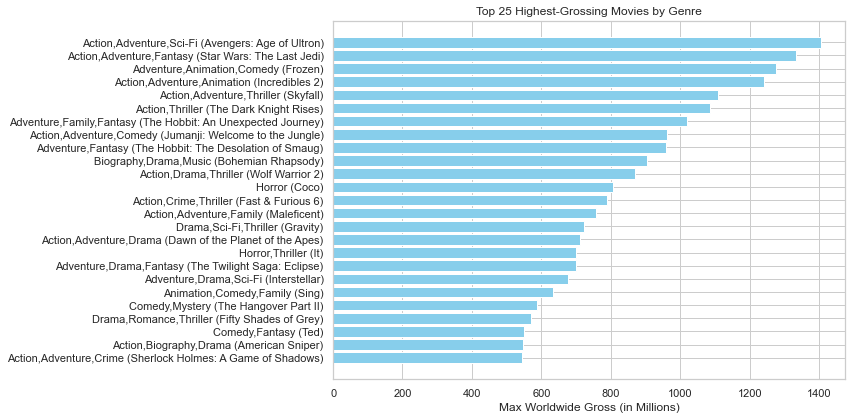

In [79]:
top25 = gross_by_genres.head(25)
top25 = top25.copy()
top25['max_gross'] = top25['max_gross'] / 1_000_000
top25['label'] = top25['genres'] + ' (' + top25['title'] + ')'
plt.figure(figsize=(12, 6))
plt.barh(top25['label'], top25['max_gross'], color='skyblue')
plt.xlabel('Max Worldwide Gross (in Millions)')
plt.title('Top 25 Highest-Grossing Movies by Genre')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

**As displayed in the above graphic, action and adventure films have dominated the list of highest grossing films**.

In [80]:
total_gross = gross_by_genres['max_gross'].sum()
print(f"Total gross (Top 25): ${total_gross:,.2f}M")

Total gross (Top 25): $50,631,246,299.00M


In [92]:
gross_by_genres['percentage'] = (gross_by_genres['max_gross'] / total_gross) * 100
gross_by_genres[['title','genres', 'max_gross', 'percentage']].head()

,title,genres,max_gross,percentage
0,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1.405400e+09,2.775756
1,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",1.332600e+09,2.631972
2,Frozen,"Adventure,Animation,Comedy",1.276400e+09,2.520973
3,Incredibles 2,"Action,Adventure,Animation",1.242800e+09,2.454611
4,Skyfall,"Action,Adventure,Thriller",1.108600e+09,2.189557


In [94]:
top_genre = gross_by_genres.loc[gross_by_genres['max_gross'].idxmax()]
print(f"Top genre: {top_genre['genres']} grossed ${top_genre['max_gross']:,.0f}M, "
      f"which is {top_genre['percentage']:.2f}% of the top 25 total.")

Top genre: Action,Adventure,Sci-Fi grossed $1,405,400,000M, which is 2.78% of the top 25 total.


In [97]:
gross_by_genres['primary_genre'] = gross_by_genres['genres'].apply(lambda x: x.split(',')[0])

genre_summary = gross_by_genres.groupby('primary_genre')['max_gross'].agg(['count', 'sum']).reset_index()
total_gross = genre_summary['sum'].sum()
genre_summary['percentage'] = (genre_summary['sum'] / total_gross) * 100

genre_summary['label'] = genre_summary['primary_genre'] + ' (' + genre_summary['percentage'].round(1).astype(str) + '%)'

genre_summary = genre_summary.sort_values('sum', ascending=False)
genre_summary

,primary_genre,count,sum,percentage,label
0,Action,55,2.071997e+10,40.923291,Action (40.9%)
1,Adventure,28,8.175633e+09,16.147406,Adventure (16.1%)
4,Comedy,38,6.222054e+09,12.288961,Comedy (12.3%)
7,Drama,34,6.133205e+09,12.113478,Drama (12.1%)
3,Biography,15,3.438841e+09,6.791934,Biography (6.8%)
9,Horror,6,2.249600e+09,4.443106,Horror (4.4%)
5,Crime,11,1.344332e+09,2.655143,Crime (2.7%)
2,Animation,7,8.074050e+08,1.594677,Animation (1.6%)
11,Mystery,2,5.549000e+08,1.095964,Mystery (1.1%)
6,Documentary,7,4.527846e+08,0.894279,Documentary (0.9%)


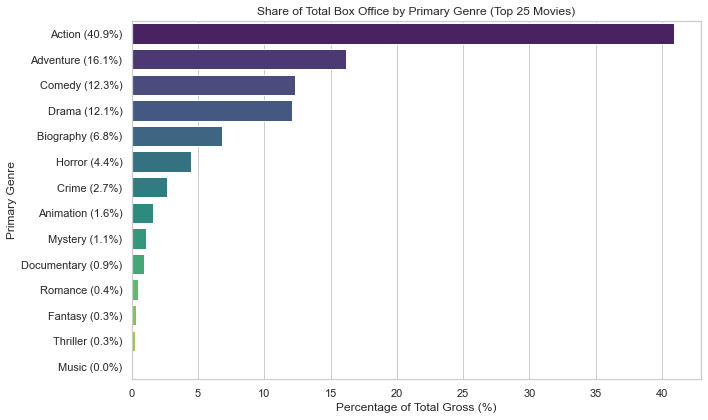

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_summary, x='percentage', y='label', palette='viridis')
plt.title("Share of Total Box Office by Primary Genre (Top 25 Movies)")
plt.xlabel("Percentage of Total Gross (%)")
plt.ylabel("Primary Genre")
plt.tight_layout()
plt.show()

**Breaking that down further, the gross revenue of the top 25 movies is comprised 40.9% by action films, followed by 16.1% by adventure films.**

**Now that we know which genres to focus on, we'll look for potential directors for our film studio.** 

In [85]:
pd.read_sql("""
SELECT primary_name AS director_name, AVG(averagerating) AS avg_director_rating, COUNT(*) AS movie_count
FROM directors
JOIN persons ON directors.person_id = persons.person_id
JOIN movie_ratings ON directors.movie_id = movie_ratings.movie_id
GROUP BY primary_name
HAVING COUNT(*) >= 10
ORDER BY avg_director_rating DESC
LIMIT 50;
""", conn)

,director_name,avg_director_rating,movie_count
0,Nuo Wang,9.100000,10
1,Corey Lubowich,9.100000,12
2,Sylvia Broeckx,9.000000,28
3,Lisa Gossels,9.000000,17
4,Erin Korbylo,9.000000,28
5,Dennis Korbylo,9.000000,28
6,Elizabeth Blake-Thomas,8.671429,14
7,Steve Ravic,8.654545,11
8,Tom Logan,8.610000,10
9,Yazan Khalili,8.600000,10


**Now we're going to adjust our parameters slight, so that we can find directors who produce action and/or adventure films with consistent high ratings. We also want to ensure they have experience with several productions, so they must have directed at least 10 action and/or adventure films.**

In [86]:
director_movie_ratings = pd.read_sql("""
SELECT 
    primary_name AS director_name, 
    AVG(averagerating) AS avg_director_rating, 
    COUNT(*) AS movie_count
FROM directors
JOIN persons ON directors.person_id = persons.person_id
JOIN movie_ratings ON directors.movie_id = movie_ratings.movie_id
JOIN movie_basics ON directors.movie_id = movie_basics.movie_id
WHERE genres LIKE '%Action%' OR genres LIKE '%Adventure%'
GROUP BY primary_name
HAVING COUNT(*) >= 10
ORDER BY avg_director_rating DESC
LIMIT 50;
""", conn)
director_movie_ratings

,director_name,avg_director_rating,movie_count
0,Joe Russo,8.246667,30
1,Anthony Russo,8.246667,30
2,Sukumar,8.210000,20
3,Pauli Janhunen Calderón,8.109524,21
4,S.S. Rajamouli,7.986364,22
5,Byron Howard,7.945455,11
6,Dean DeBlois,7.940000,10
7,Taika Waititi,7.900000,12
8,James Gunn,7.840000,25
9,James Mangold,7.716667,12


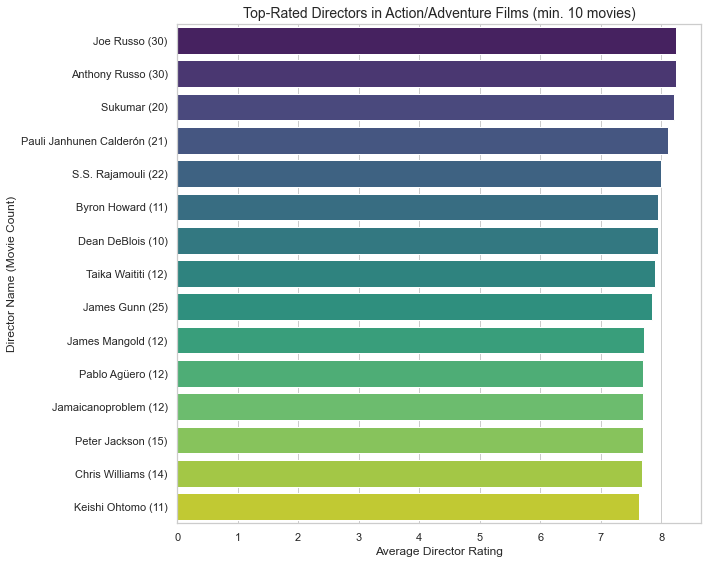

In [87]:
top_directors = director_movie_ratings.sort_values(by='avg_director_rating', ascending=False).head(15).copy()
top_directors['label'] = top_directors['director_name'] + ' (' + top_directors['movie_count'].astype(str) + ')'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    x='avg_director_rating', 
    y='label', 
    data=top_directors, 
    palette='viridis'
)
plt.title('Top-Rated Directors in Action/Adventure Films (min. 10 movies)', fontsize=14)
plt.xlabel('Average Director Rating')
plt.ylabel('Director Name (Movie Count)')
plt.tight_layout()
plt.show()

**Now we have our list of potential directors to contact.**

**Now we'll do a similar search, this time for actors. Will filter for actors and actresses who have starred in at least 10 action and/or adventure films and have receieved consistently high reviews.**

In [88]:
pd.read_sql("""
SELECT * FROM principals
;""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [100]:
actor_movie_ratings = pd.read_sql("""
SELECT 
    p.primary_name AS actor_name,
    AVG(mr.averagerating) AS avg_movie_rating,
    COUNT(*) AS movie_count
FROM principals pr
JOIN persons p ON pr.person_id = p.person_id
JOIN movie_basics mb ON pr.movie_id = mb.movie_id
JOIN movie_ratings mr ON pr.movie_id = mr.movie_id
JOIN movie_akas ma ON pr.movie_id = ma.movie_id
WHERE 
    (mb.genres LIKE '%Action%' OR mb.genres LIKE '%Adventure%')
    AND pr.category IN ('actor', 'actress')
    AND mr.averagerating >= 7.0
    AND (ma.region = 'US' OR ma.language = 'en')
GROUP BY p.primary_name
HAVING COUNT(*) >= 10
ORDER BY avg_movie_rating DESC
LIMIT 50;
""", conn)
actor_movie_ratings

,actor_name,avg_movie_rating,movie_count
0,Anne Hathaway,8.476923,13
1,Gary Oldman,8.240000,10
2,Mark Ruffalo,8.212500,24
3,Tom Hardy,8.207143,14
4,Chris Evans,8.027500,40
5,Chris Hemsworth,8.006667,30
6,Morena Baccarin,7.885714,14
7,Scarlett Johansson,7.868421,19
8,Kevin T. Collins,7.833333,12
9,Carrie Keranen,7.833333,12


In [101]:
print(actor_movie_ratings.columns)

Index(['actor_name', 'avg_movie_rating', 'movie_count'], dtype='object')


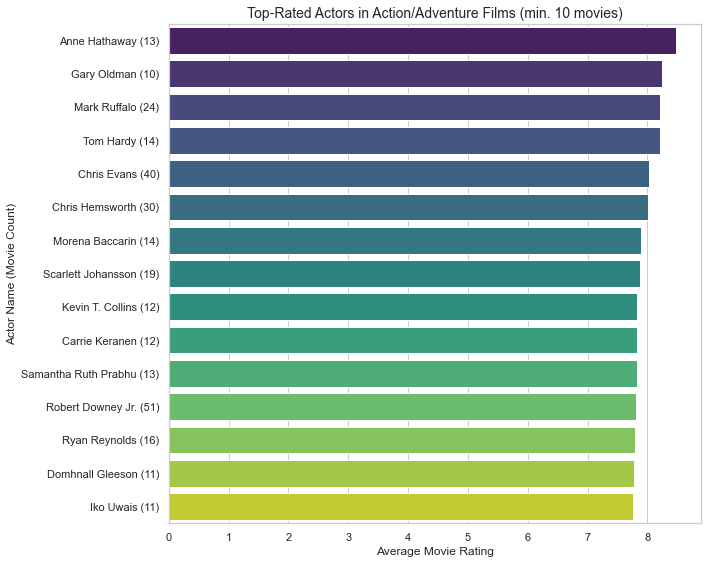

In [102]:
top_actors = actor_movie_ratings.sort_values(by='avg_movie_rating', ascending=False).head(15).copy()
top_actors['label'] = top_actors['actor_name'] + ' (' + top_actors['movie_count'].astype(str) + ')'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    x='avg_movie_rating', 
    y='label', 
    data=top_actors, 
    palette='viridis'
)
plt.title('Top-Rated Actors in Action/Adventure Films (min. 10 movies)', fontsize=14)
plt.xlabel('Average Movie Rating')
plt.ylabel('Actor Name (Movie Count)')
plt.tight_layout()
plt.show()

**And now we have our list of potential stars to contact.**

# Conclusions

Action and adventure films have performed well at the box office. The high grossing performance of these films indicates a large audience of viewers who enjoy these genres. The company can do well in this industry by working with the right individuals to direct and star in our films.

## Limitations

This initial analysis did not include average production and hiring costs per genre or movie. Potential budget constraints of our new movie studio may affect which route management decides to pursue, whether it be in the action/adventure genre or otherwise.

## Recommendations

I recommend the company review the list of potential directors and actors, and then develop an initial budget for the studio. Once we determine how much we are willing to spend on production and on procuring talent, we can examine the costs of hiring directors and actors suggested from the analysis and generate a more accurate candidate list.

## Next Steps

Following this initial analysis, we can search for potential writers and producers using these same data sources.